# <center>Tạo mạng SNN - Shallow Neural Network</center>
<div align="center">
    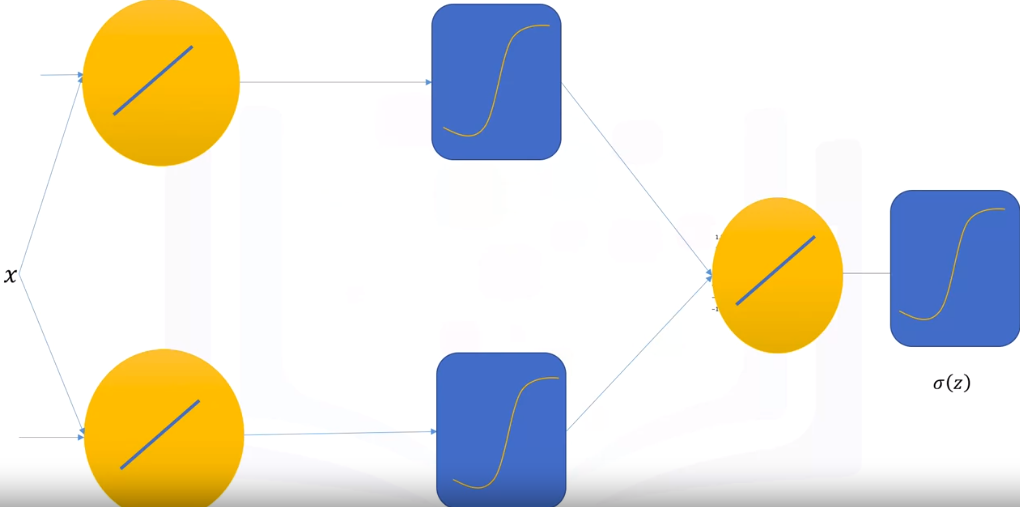
</div>




In [299]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim, sigmoid
torch.manual_seed(0)

## Create Dataset

In [313]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0]).view(-1, 1)
        for i,v in enumerate(self.x[:,0]):
            if v>=-1 and v<=1:
                self.y[i,0] = 1
        self.y = self.y.type(torch.LongTensor)
    
    def __getitem__(self, index):
        return self.x[index,:], self.y[index,:]
    
    def __len__(self):
        return self.x.shape[0]

In [314]:
# Plot Data
def plot_sample(data):
    x = data[:][0].view(-1)
    y = data[:][1].view(-1)
    plt.plot(x[y==1].numpy(), y[y==1].numpy(), 'ro')
    plt.plot(x[y==0].numpy(), y[y==0].numpy(), 'bo')
    plt.plot(x.numpy(), y.numpy())
    plt.ylim(-0.2, 3)
    plt.show()

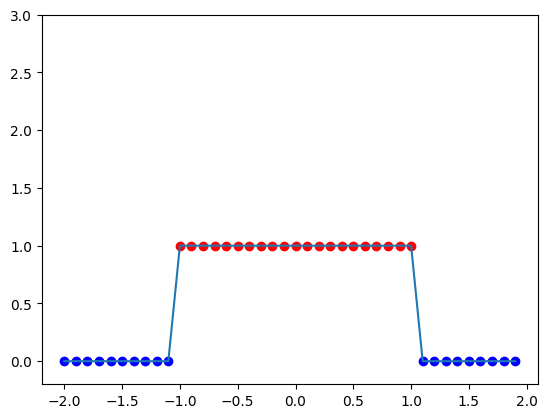

In [315]:
data = Data()
plot_sample(data)

## Create SNN
+ H: số Neural ở tầng ẩn
+ linear1: tầng ẩn  
+ linear2: tâng đầu ra  

Mỗi tầng là 1 Linear Oject, vì chỉ cần 1 Oject này thôi với có thể tính toán song song cho tất cả các Neural cùng 1 tầng. Ở trong ví dụ này, input_size=1 và H=2, thì Linear Oject sẽ tự đông tạo ra 2 bộ trọng số w ứng với từng Neural. Tầng kế tiếp sẽ nhận đầu vào là tất cả các Neural ở tầng trước đó, vì vậy input_size=H.  
yhat ở đây chưa phải là nhãn, mới chỉ là xác suất thôi.

In [316]:
class SNN(nn.Module):
    def __init__(self, input_size, H, output_size):
        super(SNN, self).__init__()
        self.linear1 = nn.Linear(input_size, H)      # hidden layer
        self.linear2 = nn.Linear(H, output_size)     # output layer
    
    def forward(self, x):
        x = sigmoid(self.linear1(x))
        yhat = sigmoid(self.linear2(x))
        return yhat

def criterion(yhat, y):
    return -1 * torch.mean(y * torch.log(yhat) + (1-y) * torch.log(1-yhat))

In [317]:
model = SNN(1, 2, 1)

## Khởi tạo bộ trọng số w, bias (Nếu khởi tạo bộ trọng số như dưới tính mãi sẽ ko có kết quả đúng)
+ Bộ trọng số ở tầng ẩn có dạng Tensor 2 chiều (2D) với mỗi chiều là 1 bộ trọng số w của Neural tương ứng.  
+ bộ giá trị của bias lúc nào cũng chỉ là Tensor 1D, do mỗi Neural chỉ có 1 bias, việc dùng Tensor 2D với mỗi chiều là 1 bias là ko cần thiết
**Giải thích tại sao kết quả kém**: do khơi tao bộ trọng số của các Neural thuộc cùng tầng là như nhau dẫn tới đàu ra và đạo hàm đầu ra của các Neural là như nhau. Kết quả cuối cùng là các Neural có w giống hệt nhau.

In [283]:
# print(model.state_dict())    # xem dạng của các tham số w, b để biết cách điều chỉnh
w1_start = torch.tensor([[1], [1]])    # bộ trọng số cho 2 Neural ở tầng ẩn
b1_start = torch.tensor([1, 1])

w2_start = torch.tensor([[2, 2]])      # bộ trọng số cho Neural ở tầng đầu ra
b2_start = torch.tensor([1])

model.state_dict()['linear1.weight'][:] = w1_start
model.state_dict()['linear1.bias'][:] = b1_start
model.state_dict()['linear2.weight'][:] = w2_start
model.state_dict()['linear2.bias'][:] = b2_start

## Tạo DataLoader, Optimazer
**Hỏi:** Tại sao dùng batch size lớn hơn thì  w ko hội tụ ?

In [318]:
trainloader = DataLoader(dataset=data, batch_size=1)
optimazer = optim.SGD(model.parameters(), lr=0.01)

## Visual Trainning Process

In [319]:
def plot_training(data, model, epoch):    
    x = data[:][0]
    y = data[:][1]
    plt.plot(x[y==1].numpy(), y[y==1].numpy(), 'ro')
    plt.plot(x[y==0].numpy(), y[y==0].numpy(), 'bo')
    plt.plot(x.numpy(), y.numpy())
    plt.ylim(-0.2, 3)
    
    yhat = model(x)
    plt.plot(x.numpy(), yhat.detach().numpy())
    plt.xlabel(f'Epoch {epoch}')
    plt.show()

## Training

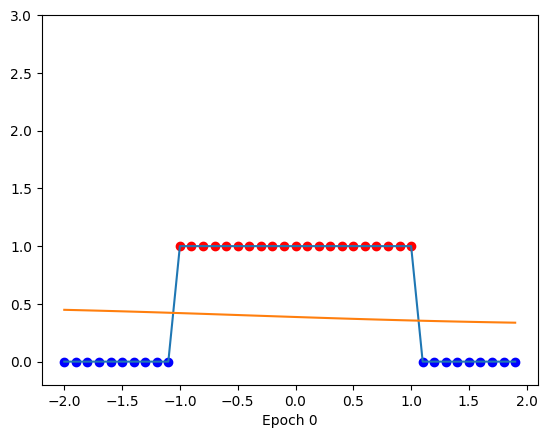

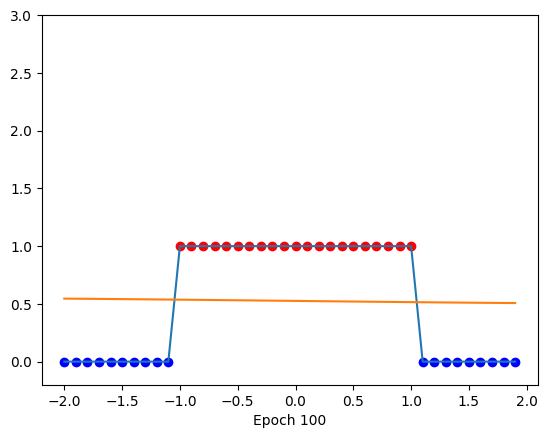

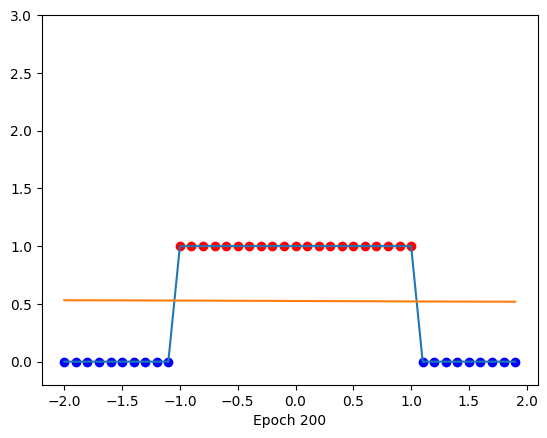

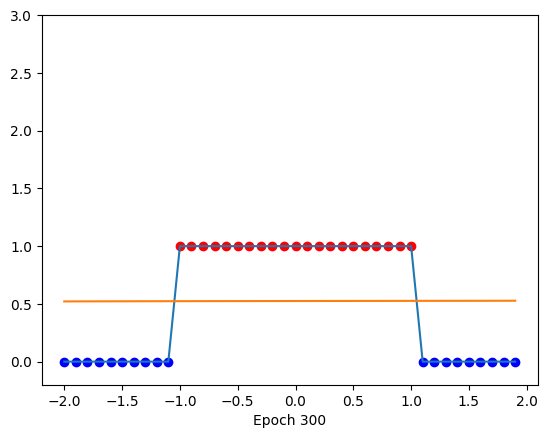

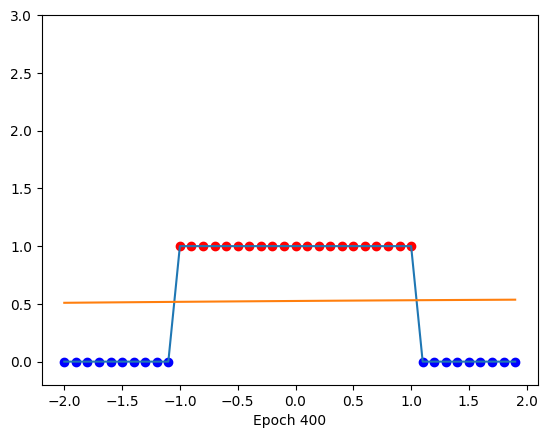

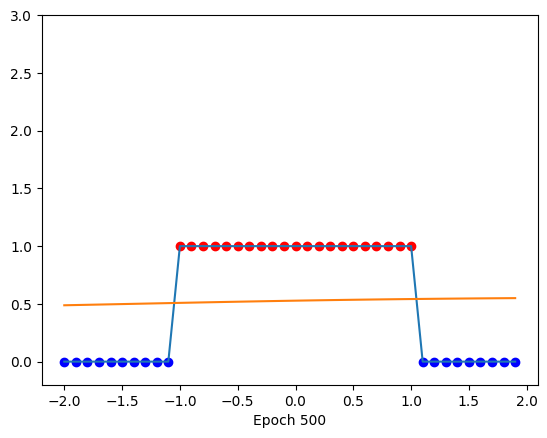

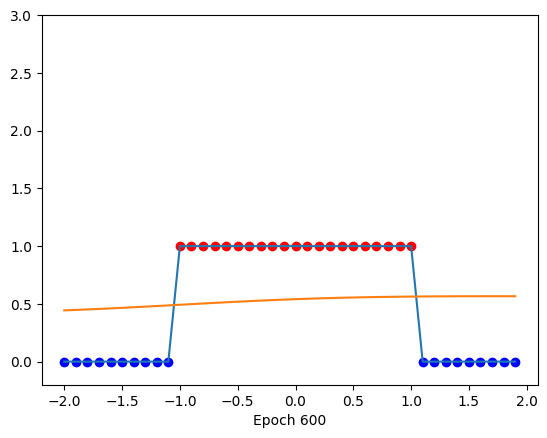

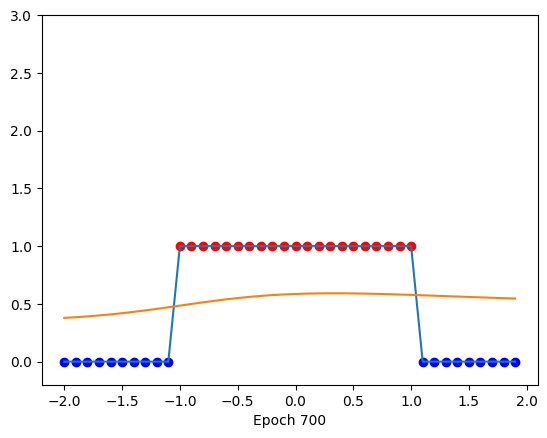

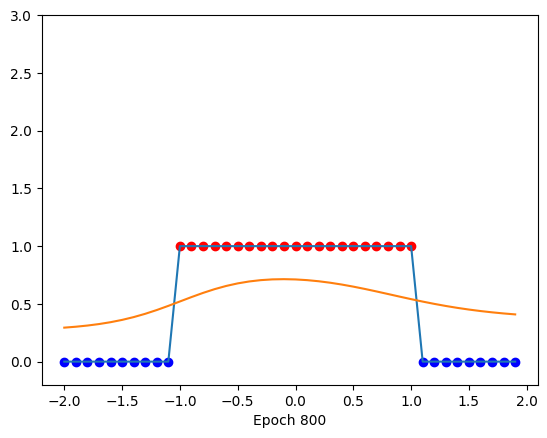

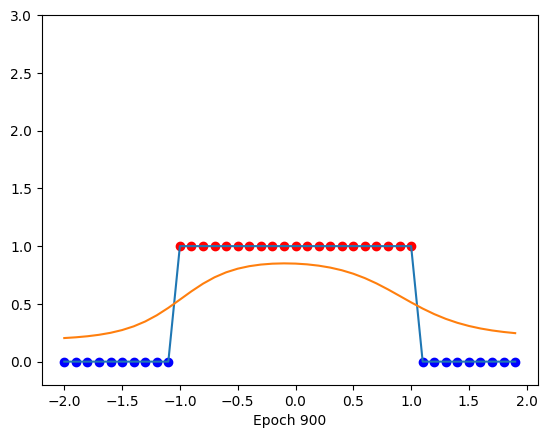

In [320]:
accurancy = []
COST = []
def training(epochs):
    for epoch in range(epochs):
        yhat = model(data[:][0])
        loss = criterion(yhat, data[:][1])
        COST.append(loss.item())
        if epoch % 100 == 0:
            plot_training(data, model, epoch)
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimazer.zero_grad()
            loss.backward()
            optimazer.step()
        # if epoch % 100 == 0:
        #     plot_training(data, model, epoch)
        # for x,y in zip(data[:][0], data[:][1]):
        #     yhat = model(x)
        #     loss = criterion(yhat, y)
        #     optimazer.zero_grad()
        #     loss.backward()
        #     optimazer.step()
            
training(1000)

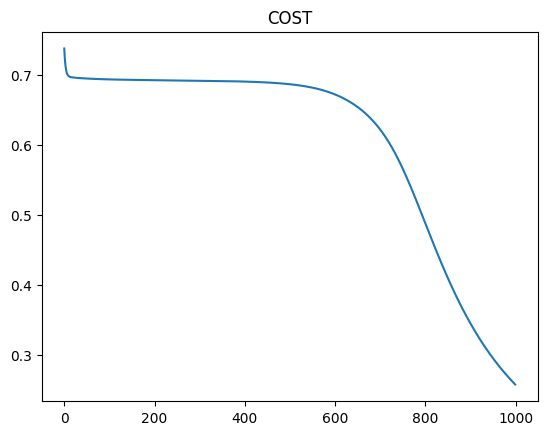

In [321]:
plt.plot(range(1000), COST) 
plt.title('COST')
plt.show()